In [2]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('lab09.ok')

Assignment: lab09
OK, version v1.13.11



# Lab 9: Feature Engineering & Cross-Validation
In this lab, you will practice using scikit-learn to do feature engineering and cross-validation to produce a model with low error on held-out data.

### Due Date 
This assignment is due on **Thursday, July 25 at 11:59pm**.

### Collaboration Policy
Data science is a collaborative activity. While you may talk with others about this assignment, we ask that you **write your solutions individually**. If you discuss the assignment with others, please **include their names** in the cell below.

**Collaborators:** *list names here*

In [3]:
# Run this cell to set up your notebook
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
sns.set_context("talk")

from IPython.display import display, Latex, Markdown

### Introduction

For this lab, we will use a toy dataset to predict the house prices in Boston with data provided by the `sklearn.datasets` package. There are more interesting datasets in the package if you want to explore them during your free time!

Run the following cell to load the data. `load_boston()` will return a dictionary object which includes keys for:
    - `data` : the covariates (X)
    - `target` : the response vector (Y)
    - `feature_names`: the column names
    - `DESCR` : a full description of the data


In [79]:
from sklearn.datasets import load_boston

boston_data = load_boston()
print(boston_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [80]:
boston_data['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [81]:
print(boston_data['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

A look at the `DESCR` attribute tells us the data contains these features:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per 10,000 USD
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of black 
                 residents by town
    13. LSTAT    % lower status of the population
    
Let's now convert this data into a pandas DataFrame. 

In [82]:
boston = pd.DataFrame(boston_data['data'], columns=boston_data['feature_names'])
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Question 1

Let's model this housing price data! Before we can do this, however, we need to split the data into training and test sets. The latter, held-out points will be used to choose the best performing model. Remember that the response vector (housing prices) lives in the `target` attribute. A random seed is set here so that we can generate the same splitting in the future if we want to test our result again and find potential bugs.

Use the [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to split out 10% of the data for test. Call the resulting splits `X_train`, `X_test`, `Y_train`, `Y_test`.

<!--
BEGIN QUESTION
name: q1
-->

In [83]:
from sklearn.model_selection import train_test_split
np.random.seed(47)

X = boston
Y = pd.Series(boston_data['target'])

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.1
)

In [84]:
ok.grade("q1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



### Question 2

As a warmup, fit a linear model to describe the relationship between the housing price and all available covariates. We've imported `sklearn.linear_model` as `lm`, so you can use that instead of typing out the whole module name. Fill in the cells below to fit a linear regression model to the covariates and create a scatter plot for our predictions vs. the true prices.

<!--
BEGIN QUESTION
name: q2
-->

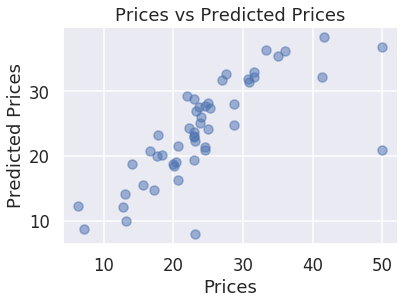

In [85]:
import sklearn.linear_model as lm

linear_model = lm.LinearRegression()

# Fit your linear model
linear_model.fit(X_train, Y_train)

# Predict housing prices on the test set
Y_pred = linear_model.predict(X_test)

# Plot predicted vs true prices
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices");

Briefly analyze the scatter plot above. Do you notice any outliers? Write your answer in the cell below.


1. The relationship between prices and the predicted prices is nearly linear, and most of the points lie on the line y = x.<br><br>
2. There are three obvious outliers in the scatterplot above, (22,9),(50,20),(50,38).

### Question 3

As we find from the scatter plot, our model is not perfect. If it were perfect, we would see the identity line (i.e. a line of slope 1). Compute the root mean squared error (RMSE) of the predicted responses: 

$$
\textbf{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^n \left( y_i - \hat{y}_i \right)^2 }
$$

Fill out the function below and compute the RMSE for our predictions on both the training data `X_train` and the test set `X_test`.  Note your implementation should not contain the word **"for"** (...that would be very slow).

<!--
BEGIN QUESTION
name: q3
-->

In [86]:
def rmse(actual_y, predicted_y):
    """
    Args:
        predicted_y: an array of the prediction from the model
        actual_y: an array of the groudtruth label
        
    Returns:
        The root mean square error between the prediction and the groudtruth
    """
    return (np.mean((predicted_y-actual_y)**2))**(1/2)

train_error = rmse(Y_train,linear_model.predict(X_train))
test_error = rmse(Y_test,Y_pred)

print("Training RMSE:", train_error)
print("Test RMSE:", test_error)

Training RMSE: 4.5629122568949025
Test RMSE: 5.884928616875511


In [87]:
ok.grade("q3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Is your training error lower than the test error? If so, why could this be happening? Answer in the cell below.

-Is your training error lower than the test error? <br>
Yes.<br><br>
-If so, why could this be happening?<br>
Because the linear model was trained on the training data, which meant it has already seen the data from the training set before, therefore, the training error would be lower than the test error, because the linear model has never been tested on the testing set before.

## Cross Validation

Let's try building a simpler linear model with fewer features. While this may increase our training error, it may also decrease our test error and help prevent overfitting to the training set.

In the next section, we'll use $k$-fold cross-validation to select the best subset of features for our model. Recall the approach looks something like:

<img src="cv.png" width=500px>

**Warning**: Don't use the test set to perform the feature selection! We want to avoid using the test set too frequently, as we want to preserve some data to see how well our model truly performs. When selecting features or choosing hyper-parameters, we can split the training set further into train and validation sets. Then we can use the average validation error to help select hyper-parameters.

### Question 4

Scikit-learn has built-in support for cross validation.  However, to better understand how cross validation works complete the following function which cross validates a given model.

1. Use the [`KFold.split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) function to get 4 splits on the training data. Note that `split` returns the indices of the data for that split.
2. For each split, select out the rows and columns based on the split indices and features.
3. Compute the RMSE on the validation split.
4. Return the average error across all cross validation splits.

<!--
BEGIN QUESTION
name: q4
-->

In [88]:
from sklearn.model_selection import KFold

def compute_CV_error(model, X_train, Y_train):
    '''
    Split the training data into 4 subsets.
    For each subset, 
        fit a model holding out that subset
        compute the MSE on that subset (the validation set)
    You should be fitting 4 models total.
    Return the average MSE of these 4 folds.

    Args:
        model: an sklearn model with fit and predict functions 
        X_train (data_frame): Training data
        Y_train (data_frame): Label 

    Return:
        the average validation MSE for the 4 splits.
    '''
    kf = KFold(n_splits=4)
    validation_errors = []
    
    for train_idx, valid_idx in kf.split(X_train):
        # split the data
        split_X_train, split_X_valid = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        split_Y_train, split_Y_valid = Y_train.iloc[train_idx], Y_train.iloc[valid_idx]

        # Fit the model on the training split
        model.fit(split_X_train, split_Y_train)
        
        # Compute the RMSE on the validation split
        error = rmse(split_Y_valid, model.predict(split_X_valid))


        validation_errors.append(error)
        
    return np.mean(validation_errors)

In [89]:
ok.grade("q4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 5

We have defined four different feature sets, each containing three features (stored in `feature_sets` below). Use `compute_CV_error` to determine which feature set gets us the lowest average validation error. Then, fill in the variables `best_err_idx`, `best_err`, and `best_feature_set` below.

**Hint:** To find the index of the lowest error in `errors`, you may want to use [`np.argmin`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html).

<!--
BEGIN QUESTION
name: q5
-->

In [90]:
feature_sets = [
    ['TAX', 'INDUS', 'CRIM'], 
    ['RM', 'LSTAT', 'PTRATIO'], 
    ['RM', 'B', 'NOX'], 
    ['TAX', 'LSTAT', 'DIS']
]

errors = []
for feat in feature_sets:
    print("Trying features:", feat)
    model = lm.LinearRegression()
    # compute the cross validation error
    error = compute_CV_error(model, X_train[feat], Y_train)
    
    print("\tRMSE:", error)
    errors.append(error)

best_err_idx = np.argmin(errors)
best_err = errors[best_err_idx]
best_feature_set = feature_sets[best_err_idx]

for i in range(4):
    print('{}, error: {}'.format(feature_sets[i], errors[i]))

best_feature_set, best_err

Trying features: ['TAX', 'INDUS', 'CRIM']
	RMSE: 7.597409455770146
Trying features: ['RM', 'LSTAT', 'PTRATIO']
	RMSE: 5.221575997721903
Trying features: ['RM', 'B', 'NOX']
	RMSE: 5.803276796238313
Trying features: ['TAX', 'LSTAT', 'DIS']
	RMSE: 6.150288547992476
['TAX', 'INDUS', 'CRIM'], error: 7.597409455770146
['RM', 'LSTAT', 'PTRATIO'], error: 5.221575997721903
['RM', 'B', 'NOX'], error: 5.803276796238313
['TAX', 'LSTAT', 'DIS'], error: 6.150288547992476


(['RM', 'LSTAT', 'PTRATIO'], 5.221575997721903)

In [91]:
ok.grade("q5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



Why is it logical to use the set of features that result in the smallest average root mean squared error when performing cross-validation? 

We want to minimize the error of our model. When performing cross-validation on every set of features, we would create 4 models and we would pick the model with the lowest validation error for every set of features. After we have performed cross-validation on every set of features, we would get four models from each of the set, and the best set should be the one that result in the smallest average root mean squared error when performing cross-validation.

### Question 6

Finally, fit a linear model using your best feature set and predict housing prices for your original test set. You can also try to select your own features (on top of the given ones) to lower the RMSE. Compute the final train and test RMSEs for a linear model using your best feature set.

<!--
BEGIN QUESTION
name: q6
-->

In [92]:
# Fit your linear model
linear_model.fit(X_train[best_feature_set],Y_train)

# Predict points from our test set and calculate the mse
train_rmse = rmse(Y_train, linear_model.predict(X_train[best_feature_set]))
test_rmse = rmse(Y_test,linear_model.predict(X_test[best_feature_set]))

print("Train RMSE", train_rmse)
print("KFold Validation RMSE", best_err)
print("Test RMSE", test_rmse)

Train RMSE 5.145323898909591
KFold Validation RMSE 5.221575997721903
Test RMSE 5.846401452163671


In [93]:
ok.grade("q6");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [96]:
X_train[best_feature_set]

,RM,LSTAT,PTRATIO
206,6.326,10.97,18.6
404,5.531,27.38,20.2
318,6.382,10.36,18.4
373,4.906,34.77,20.2
502,6.120,9.08,21.0
317,5.782,15.94,18.4
389,5.390,20.85,20.2
388,4.880,30.62,20.2
191,6.739,4.69,15.2
457,5.936,16.94,20.2


Here we've plotted a residual plot for each record from `X_test`. After seeing your testing and training error, it is often helpful to visiualize your error. When points in the residual plot are randomly scattered around the line y = 0, then we know that a linear regression model is good for the data we have.

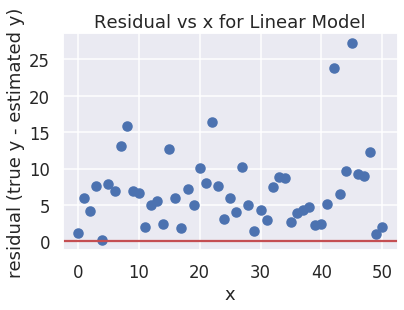

In [94]:
plt.scatter(np.arange(len(X_test)), Y_test - model.predict(X_test[best_feature_set]))
plt.xlabel('x')
plt.ylabel('residual (true y - estimated y)')
plt.title('Residual vs x for Linear Model')
plt.axhline(y = 0, color='r');

Nice! You've used $k$-fold cross-validation to fit a linear regression model to the housing data.

In the future, you'd probably want to use something like [`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) to automatically perform cross-validation, but it's instructive to do it yourself at least once.

## Congratulations!

You are finished with this assignment. Please don't forget to submit by 11:59pm on Thursday!

# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

In [95]:
# Save your notebook first, then run this cell to submit.
ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab09.ipynb'.
Submit... 100% complete
Submission successful for user: shangxin.wang@berkeley.edu
URL: https://okpy.org/cal/data100/su19/lab09/submissions/NLgNYp

